In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.data.dataset import ImageDataset
from sklearn.multioutput import MultiOutputClassifier

In [3]:
import logging
logging.basicConfig(level=logging.INFO,
format='%(asctime)s.%(msecs)03d :%(message)s',
datefmt='%Y-%m-%d %H:%M:%S')

In [4]:
base_path = os.path.join(os.getcwd(), "..")

transformations = [
    ('resize', {'size': (320, 320)}),
    ('flatten', {})
]
image_path = os.path.join(base_path, "data", "raw")
train_csv_path = os.path.join(base_path, "data", "raw", "CheXpert-v1.0-small", "train.csv")
return_labels = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
'Pleural Effusion']
classes = np.array([[0, 1] for y in return_labels]).astype(np.float32)


## Batch size tunning  for partial_fit

In [5]:
limit = 100000
batchsize=1000
train_dataset = ImageDataset(label_csv_path=train_csv_path, image_path_base=image_path, limit=limit,
transformations=transformations, map_option='Random')

In [6]:
from src.models.sklearn_models import models
base_model = models['MultinomialNB']
model = MultiOutputClassifier(base_model, n_jobs=1)


In [8]:
import time

def test_batch_load(model, batch_size, batch_num=1):
    logging.info(f'Training model on batch size {batch_size} ')
    start = time.time()
    for i, (x_features, x_image, y) in enumerate(train_dataset.batchloader(batch_size, return_labels)):
        if i+1 > batch_num:
            break
        X = pd.concat([pd.DataFrame(x_features), pd.DataFrame(x_image)], axis=1)
        logging.info(f'Training model on batch {(i + 1)} out of {batch_num}')
        model.partial_fit(X, y, classes=classes)
    end = time.time()
    return (end -  start) / batch_num / batch_size


In [9]:
size_list = [10, 100, 1000, 10000]
time_per_record = []

for size in size_list:
    time_per_record.append(test_batch_load(model, size))

2021-07-25 12:58:19.940 :Training model on batch size 10 
2021-07-25 12:58:24.131 :Training model on batch 1 out of 1
2021-07-25 12:58:28.808 :Training model on batch size 100 
2021-07-25 12:58:35.583 :Training model on batch 1 out of 1
2021-07-25 12:58:42.799 :Training model on batch size 1000 
2021-07-25 12:59:26.244 :Training model on batch 1 out of 1
2021-07-25 13:00:08.411 :Training model on batch size 10000 
2021-07-25 13:50:29.955 :Training model on batch 1 out of 1


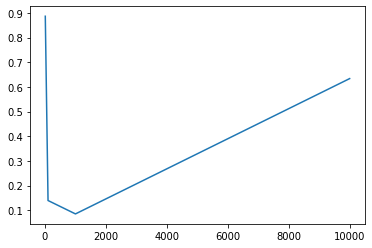

In [12]:

plt.plot(size_list, time_per_record)

2021-07-25 15:08:39.681 :Training model on batch size 10 
2021-07-25 15:08:44.026 :Training model on batch 1 out of 1
2021-07-25 15:08:48.813 :Training model on batch size 30 
2021-07-25 15:08:53.521 :Training model on batch 1 out of 1
2021-07-25 15:08:58.845 :Training model on batch size 50 
2021-07-25 15:09:04.119 :Training model on batch 1 out of 1
2021-07-25 15:09:10.101 :Training model on batch size 70 
2021-07-25 15:09:16.363 :Training model on batch 1 out of 1
2021-07-25 15:09:23.138 :Training model on batch size 90 
2021-07-25 15:09:30.675 :Training model on batch 1 out of 1
2021-07-25 15:09:38.516 :Training model on batch size 111 
2021-07-25 15:09:45.912 :Training model on batch 1 out of 1
2021-07-25 15:09:53.818 :Training model on batch size 131 
2021-07-25 15:10:02.207 :Training model on batch 1 out of 1
2021-07-25 15:10:10.663 :Training model on batch size 151 
2021-07-25 15:10:19.075 :Training model on batch 1 out of 1
2021-07-25 15:10:28.241 :Training model on batch size

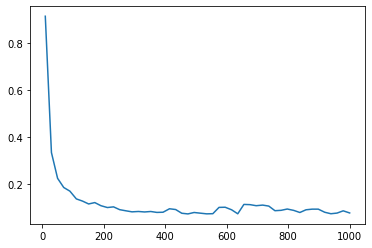

In [14]:
size_list = np.linspace(10, 1000, 50).astype(np.int32)
time_per_record = []

for size in size_list:
    time_per_record.append(test_batch_load(model, size))
plt.plot(size_list, time_per_record)

2021-07-25 17:05:19.210 :Training model on batch size 400 
2021-07-25 17:05:34.119 :Training model on batch 1 out of 1
2021-07-25 17:05:49.492 :Training model on batch size 484 
2021-07-25 17:06:06.038 :Training model on batch 1 out of 1
2021-07-25 17:06:26.111 :Training model on batch size 568 
2021-07-25 17:06:46.629 :Training model on batch 1 out of 1
2021-07-25 17:07:11.683 :Training model on batch size 652 
2021-07-25 17:07:35.333 :Training model on batch 1 out of 1
2021-07-25 17:07:59.913 :Training model on batch size 736 
2021-07-25 17:08:26.417 :Training model on batch 1 out of 1
2021-07-25 17:08:54.522 :Training model on batch size 821 
2021-07-25 17:09:24.305 :Training model on batch 1 out of 1
2021-07-25 17:09:56.245 :Training model on batch size 905 
2021-07-25 17:10:28.606 :Training model on batch 1 out of 1
2021-07-25 17:11:07.519 :Training model on batch size 989 
2021-07-25 17:11:43.223 :Training model on batch 1 out of 1
2021-07-25 17:12:20.949 :Training model on batch

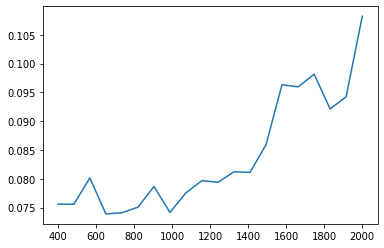

In [16]:
size_list = np.linspace(400, 2000, 20).astype(np.int32)
time_per_record = []

for size in size_list:
    time_per_record.append(test_batch_load(model, size))
plt.plot(size_list, time_per_record)